In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First five rows of the dataset

In [11]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Description
### survival: Survival (0 = No; 1 = Yes)
### pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
### name: Name
### sex: Sex
### age: Age
### sibsp: Number of Siblings/Spouses Aboard
### parch: Number of Parents/Children Aboard
### ticket: Ticket Number
### fare: Passenger Fare
### cabin: Cabin
### embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Statistical summary of the dataset

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data type of each column

In [80]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Remove columns that are not needed

In [14]:
titanic_cleaned = titanic.drop(['SibSp', 'Name', 'Parch','Fare','Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


# Count of passengers who survived

<Figure size 576x576 with 0 Axes>

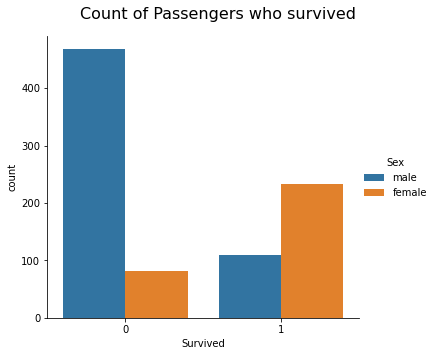

In [96]:
plt.figure(figsize=(8,8))
sns.factorplot('Survived', hue='Sex',data=titanic, kind='count')
plt.suptitle('Count of Passengers who survived', fontsize=16)

plt.subplots_adjust(top=0.9)

## The above plot shows that the people that females were the highest survivors

# Age distribution of passengers

Text(0, 0.5, 'Count')

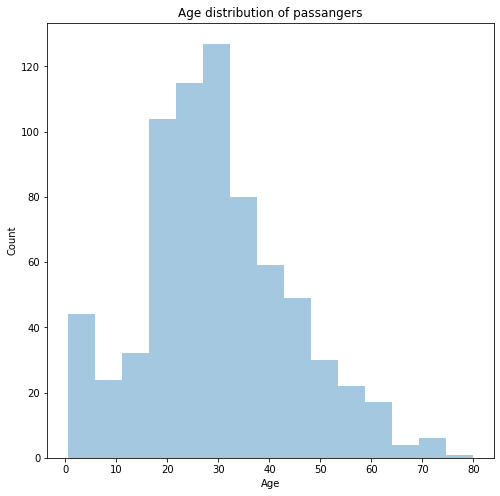

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(titanic['Age'].dropna(), kde= False, bins=15)
plt.title('Age distribution of passangers')
plt.ylabel('Count')



## From the above graph, we can see that a larger part of the passangers were between age 20-40

# Age distibution of make and female survivors

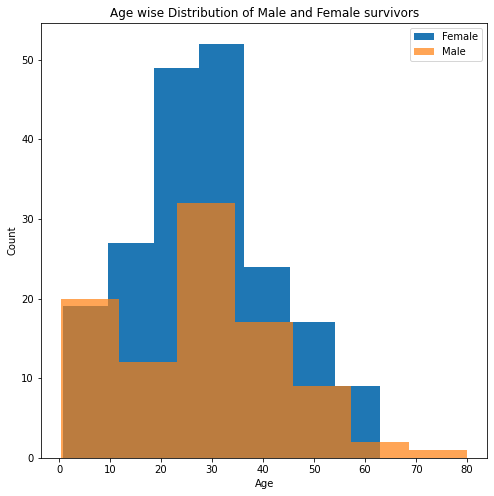

In [40]:
plt.figure(figsize=(8,8), edgecolor='red')

plt.hist(titanic['Age'][(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic['Age'][(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

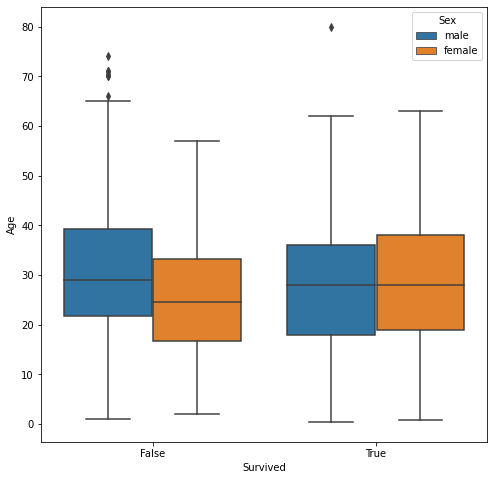

In [86]:
plt.figure(figsize=(8,8))
sns.boxplot(x=(titanic['Survived']==1),y=(titanic['Age']),hue=(titanic['Sex']))

## From the above plots, we see that the age range of males that survived is from 20 to 35 years while females from age 20 to 40 survived

# Group the data by passenger class, survival and sex

In [47]:
grouped_by_pclass = titanic.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

Text(0.5, 0.98, 'Class wise segregation of passengers')

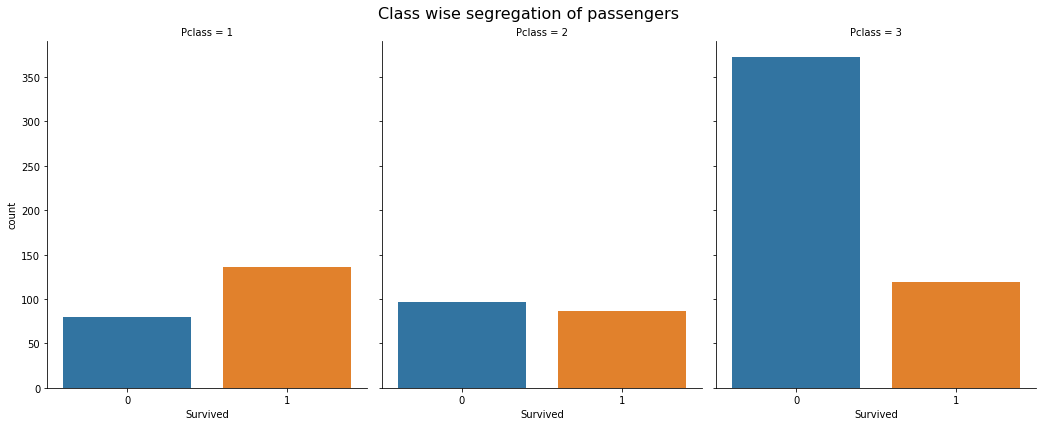

In [66]:
sns.factorplot('Survived', col='Pclass', data=titanic, kind='count', size=6, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)



## From the adove factorplot, we see that more people survived in first class and many people did not survive in third class

Text(0.5, 0.98, 'Segregation of passengers according to boarding ports')

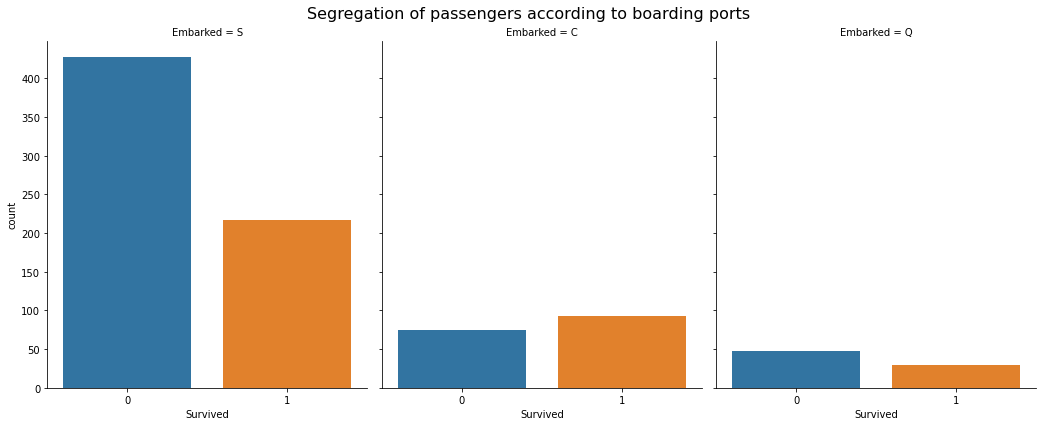

In [67]:
sns.factorplot('Survived', col='Embarked', data=titanic, kind='count', size=6, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Segregation of passengers according to boarding ports', fontsize=16)

## From the factorplot above, we notice that most people that boarded from Southampton and Queenstown did not survive while more of the passengers that boarded from Cherbourg survived

# Conclusion
## From the above analysis, we can infer that
### 1. More women survived the shipwreck
### 2. There was no significant effecct of passanger class on survival. However, a lot of third class passengers did not survived
### 3. Most people boarded from the Southampton port but majority did not survive. But most passengers that borded at Cherbourg survived. However, most passengers from Queenstown did not survive.